In [1]:
import os 
import glob
import json
import numpy as np
import cv2

In [2]:
train_path = "C:/Users/Marcus Hansen/Desktop/GitHub/archive/train"
test_path = "C:/Users/Marcus Hansen/Desktop/GitHub/archive/test"
valid_path = "C:/Users/Marcus Hansen/Desktop/GitHub/archive/valid"

In [3]:
train_data=[image for image in os.listdir(train_path)]


In [4]:
with open('C:/Users/Marcus Hansen/Desktop/GitHub/archive/train/_annotations.coco.json','r') as file:
    data = json.load(file)

for img in data['annotations'][:10]:
    print(img['bbox'])

[145, 239, 168.75, 162.5]
[194, 176, 148.75, 233.75]
[133, 173, 162.5, 185]
[245, 358, 138.75, 166.25]
[80, 189, 112.5, 132.5]
[293, 150, 182.5, 135]
[199, 165, 171.25, 133.75]
[350, 288, 42.5, 52.5]
[239, 250, 61.25, 87.5]
[73, 139, 206.25, 166.25]


In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def display_image_with_annotations(ax, image, annotations, display_type='both', colors=None):
    ax.imshow(image)
    ax.axis('off')  # Turn off the axes

    # Define a default color map if none is provided
    if colors is None:
        colors = plt.cm.tab10

    for ann in annotations:
        category_id = ann['category_id']
        color = colors(category_id % 10)
        
        # Display bounding box
        if display_type in ['bbox', 'both']:
            bbox = ann['bbox']  # COCO format: [x_min, y_min, width, height]
            rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor=color, facecolor='none')
            ax.add_patch(rect)
        
        # Display segmentation polygon
        if display_type in ['seg', 'both']:
            for seg in ann['segmentation']:
                poly = [(seg[i], seg[i+1]) for i in range(0, len(seg), 2)]
                polygon = patches.Polygon(poly, closed=True, edgecolor=color, fill=False)
                ax.add_patch(polygon)

def display_images_with_coco_annotations(image_paths, annotations, display_type='both', colors=None):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    for ax, img_path in zip(axs.ravel(), image_paths):
        # Load image using OpenCV and convert it from BGR to RGB color space
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Get image filename to match with annotations
        img_filename = os.path.basename(img_path)
        img_id = next(item for item in annotations['images'] if item["file_name"] == img_filename)['id']
        
        # Filter annotations for the current image
        img_annotations = [ann for ann in annotations['annotations'] if ann['image_id'] == img_id]
        
        display_image_with_annotations(ax, image, img_annotations, display_type, colors)

    plt.tight_layout()
    plt.show()

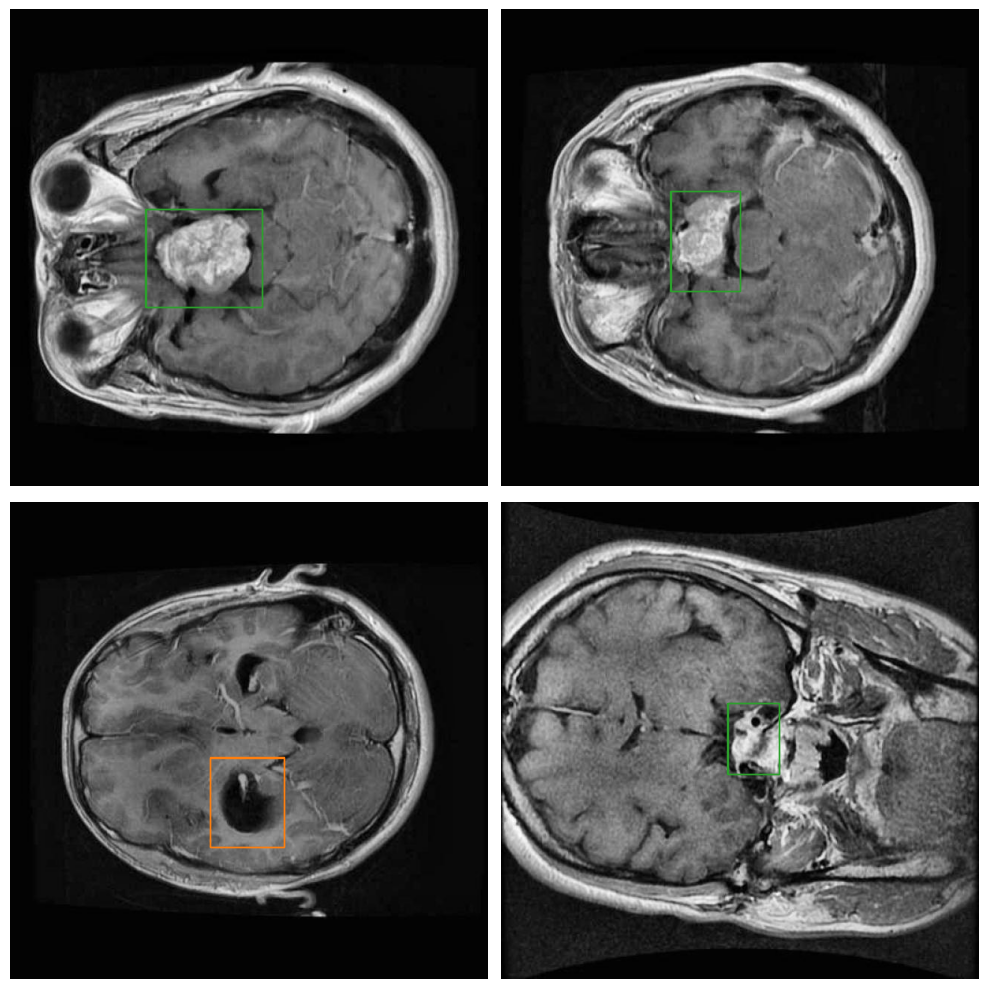

In [16]:
import random 
with open('C:/Users/Marcus Hansen/Desktop/GitHub/archive/train/_annotations.coco.json', 'r') as f:
    annotations = json.load(f)

# Get all image files   
image_dir = 'C:/Users/Marcus Hansen/Desktop/GitHub/archive/train/'
all_image_files = [os.path.join(image_dir, img['file_name']) for img in annotations['images']]
random_image_files = random.sample(all_image_files, 4)

# Choose between 'bbox', 'seg', or 'both'
display_type = 'both'
display_images_with_coco_annotations(random_image_files, annotations, display_type)